<a href="https://colab.research.google.com/github/wecchi/univesp_com200/blob/main/Sem2/Nascimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

> Usando a **visualização e a transformação** para explorar os dados de forma sistemática, uma tarefa que os estatísticos chamam de análise exploratória de dados, ou **EDA** para abreviar. EDA é um ciclo iterativo:
*  Gere perguntas sobre seus dados.
*  Procure respostas visualizando, transformando e modelando seus dados.
*  Use o que aprendeu para refinar suas perguntas e/ou gerar novas perguntas.

> O EDA não é um processo formal com um conjunto rigoroso de regras. Mais do que tudo, o EDA é um estado de espírito. Durante as fases iniciais do EDA, você deve se sentir livre para investigar todas as ideias que lhe ocorrem. Algumas dessas ideias darão certo, e algumas serão becos sem saída. À medida que sua exploração continua, você vai abrigar em algumas áreas particularmente produtivas que você eventualmente escreverá e se comunicará com os outros.

> **O EDA é uma parte importante de qualquer análise de dados**, mesmo que as perguntas sejam entregues a você em uma bandeja, porque você sempre precisa investigar a qualidade de seus dados. A limpeza de dados é apenas uma aplicação do EDA: você faz perguntas sobre se seus dados atende ou não às suas expectativas. Para fazer a limpeza de dados, você precisará implantar todas as ferramentas do EDA: visualização, transformação e modelagem.

> FONTE: https://r4ds.had.co.nz/exploratory-data-analysis.html

## Obtendo dados

No repositório https://github.com/fivethirtyeight/data existem diversos Datasets para teste, escolhi os dados de nascimentos nos Estados Unidos para os anos de 2000 a 2014, fornecidos pela _Social Security Administration_ (Administração da Previdência Social).

### Dicionário de dados
|Atributo|Descrição|
|:-------|:--------|
|year|ano|
|month|mês|
|date_of_month|número do dia do mês|
|day_of_week|dia da semana (1 é segunda e 7 é domingo)|
|births|número de nascimentos|

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv"
nascimentos = pd.read_csv(url, error_bad_lines=False, encoding='latin-1')
nascimentos.tail()

,year,month,date_of_month,day_of_week,births
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634
5478,2014,12,31,3,11990


In [ ]:
# Verificando se existem campos faltantes
nascimentos.isna().sum()

year             0
month            0
date_of_month    0
day_of_week      0
births           0
dtype: int64

In [15]:
# Verificando valores únicos
column_range=dict()
for column in nascimentos.columns:
  column_range[column] = nascimentos[column].unique()

column_range

{'births': array([ 9083,  8006, 11363, ...,  6749, 10386, 12811]),
 'date_of_month': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 'day_of_week': array([6, 7, 1, 2, 3, 4, 5]),
 'month': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'year': array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014])}

## Análise exploratória

In [60]:
nascimentos.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


### Variável _year_

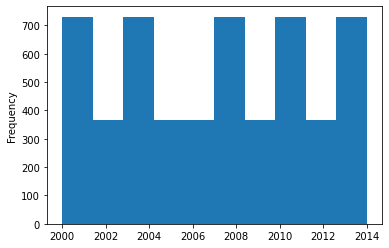

In [17]:
import seaborn as sns
nascimentos.year.plot(kind = "hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


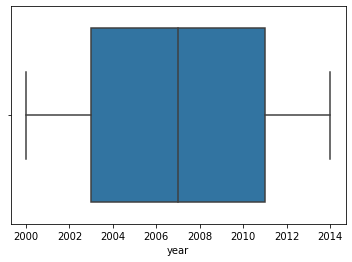

In [18]:
sns.boxplot(nascimentos.year)

### Variável _month_

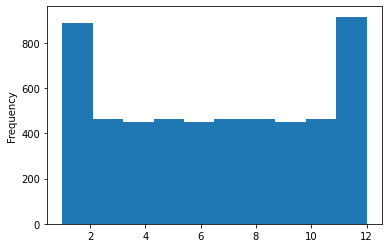

In [20]:
nascimentos.month.plot(kind = 'hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


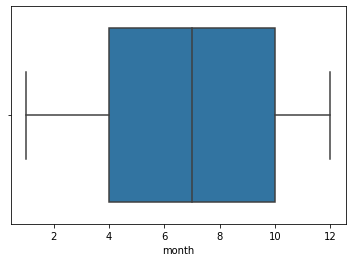

In [21]:
sns.boxplot(nascimentos.month)

### Variável _date_of_month_

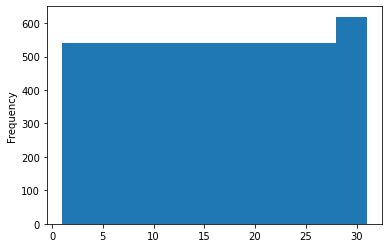

In [22]:
nascimentos.date_of_month.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


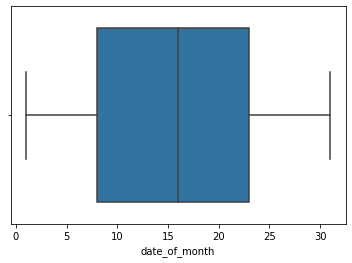

In [23]:
sns.boxplot(nascimentos.date_of_month)

### Variável _day_of_week_

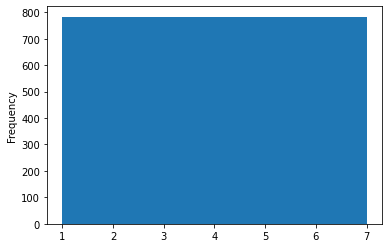

In [25]:
nascimentos.day_of_week.plot(kind="hist", bins=7)

### Quantos nasceram por ano? mês e dia?

In [44]:
por_ano = nascimentos.groupby(by="year", axis=0)["births"].sum()

In [45]:
por_mes = nascimentos.groupby(by=['month'])['births'].sum()

In [46]:
por_dia_mes = nascimentos.groupby(by="date_of_month")['births'].sum()

In [47]:
por_dia_semana = nascimentos.groupby(by="day_of_week")['births'].sum()

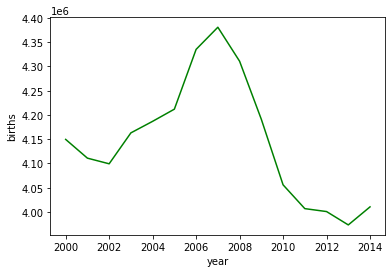

In [53]:
sns.lineplot(data=por_ano, color='green')

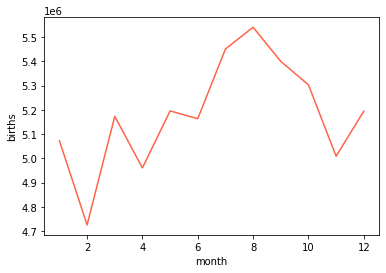

In [55]:
sns.lineplot(data=por_mes, color='tomato')

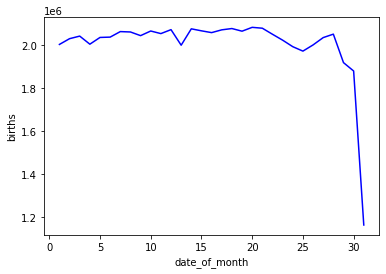

In [56]:
sns.lineplot(data=por_dia_mes, color="blue")

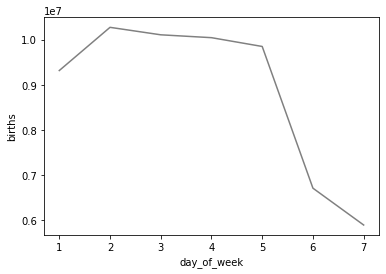

In [57]:
sns.lineplot(data=por_dia_semana, color="gray")

### Existe correlação entre o número de nascimentos e os dias?

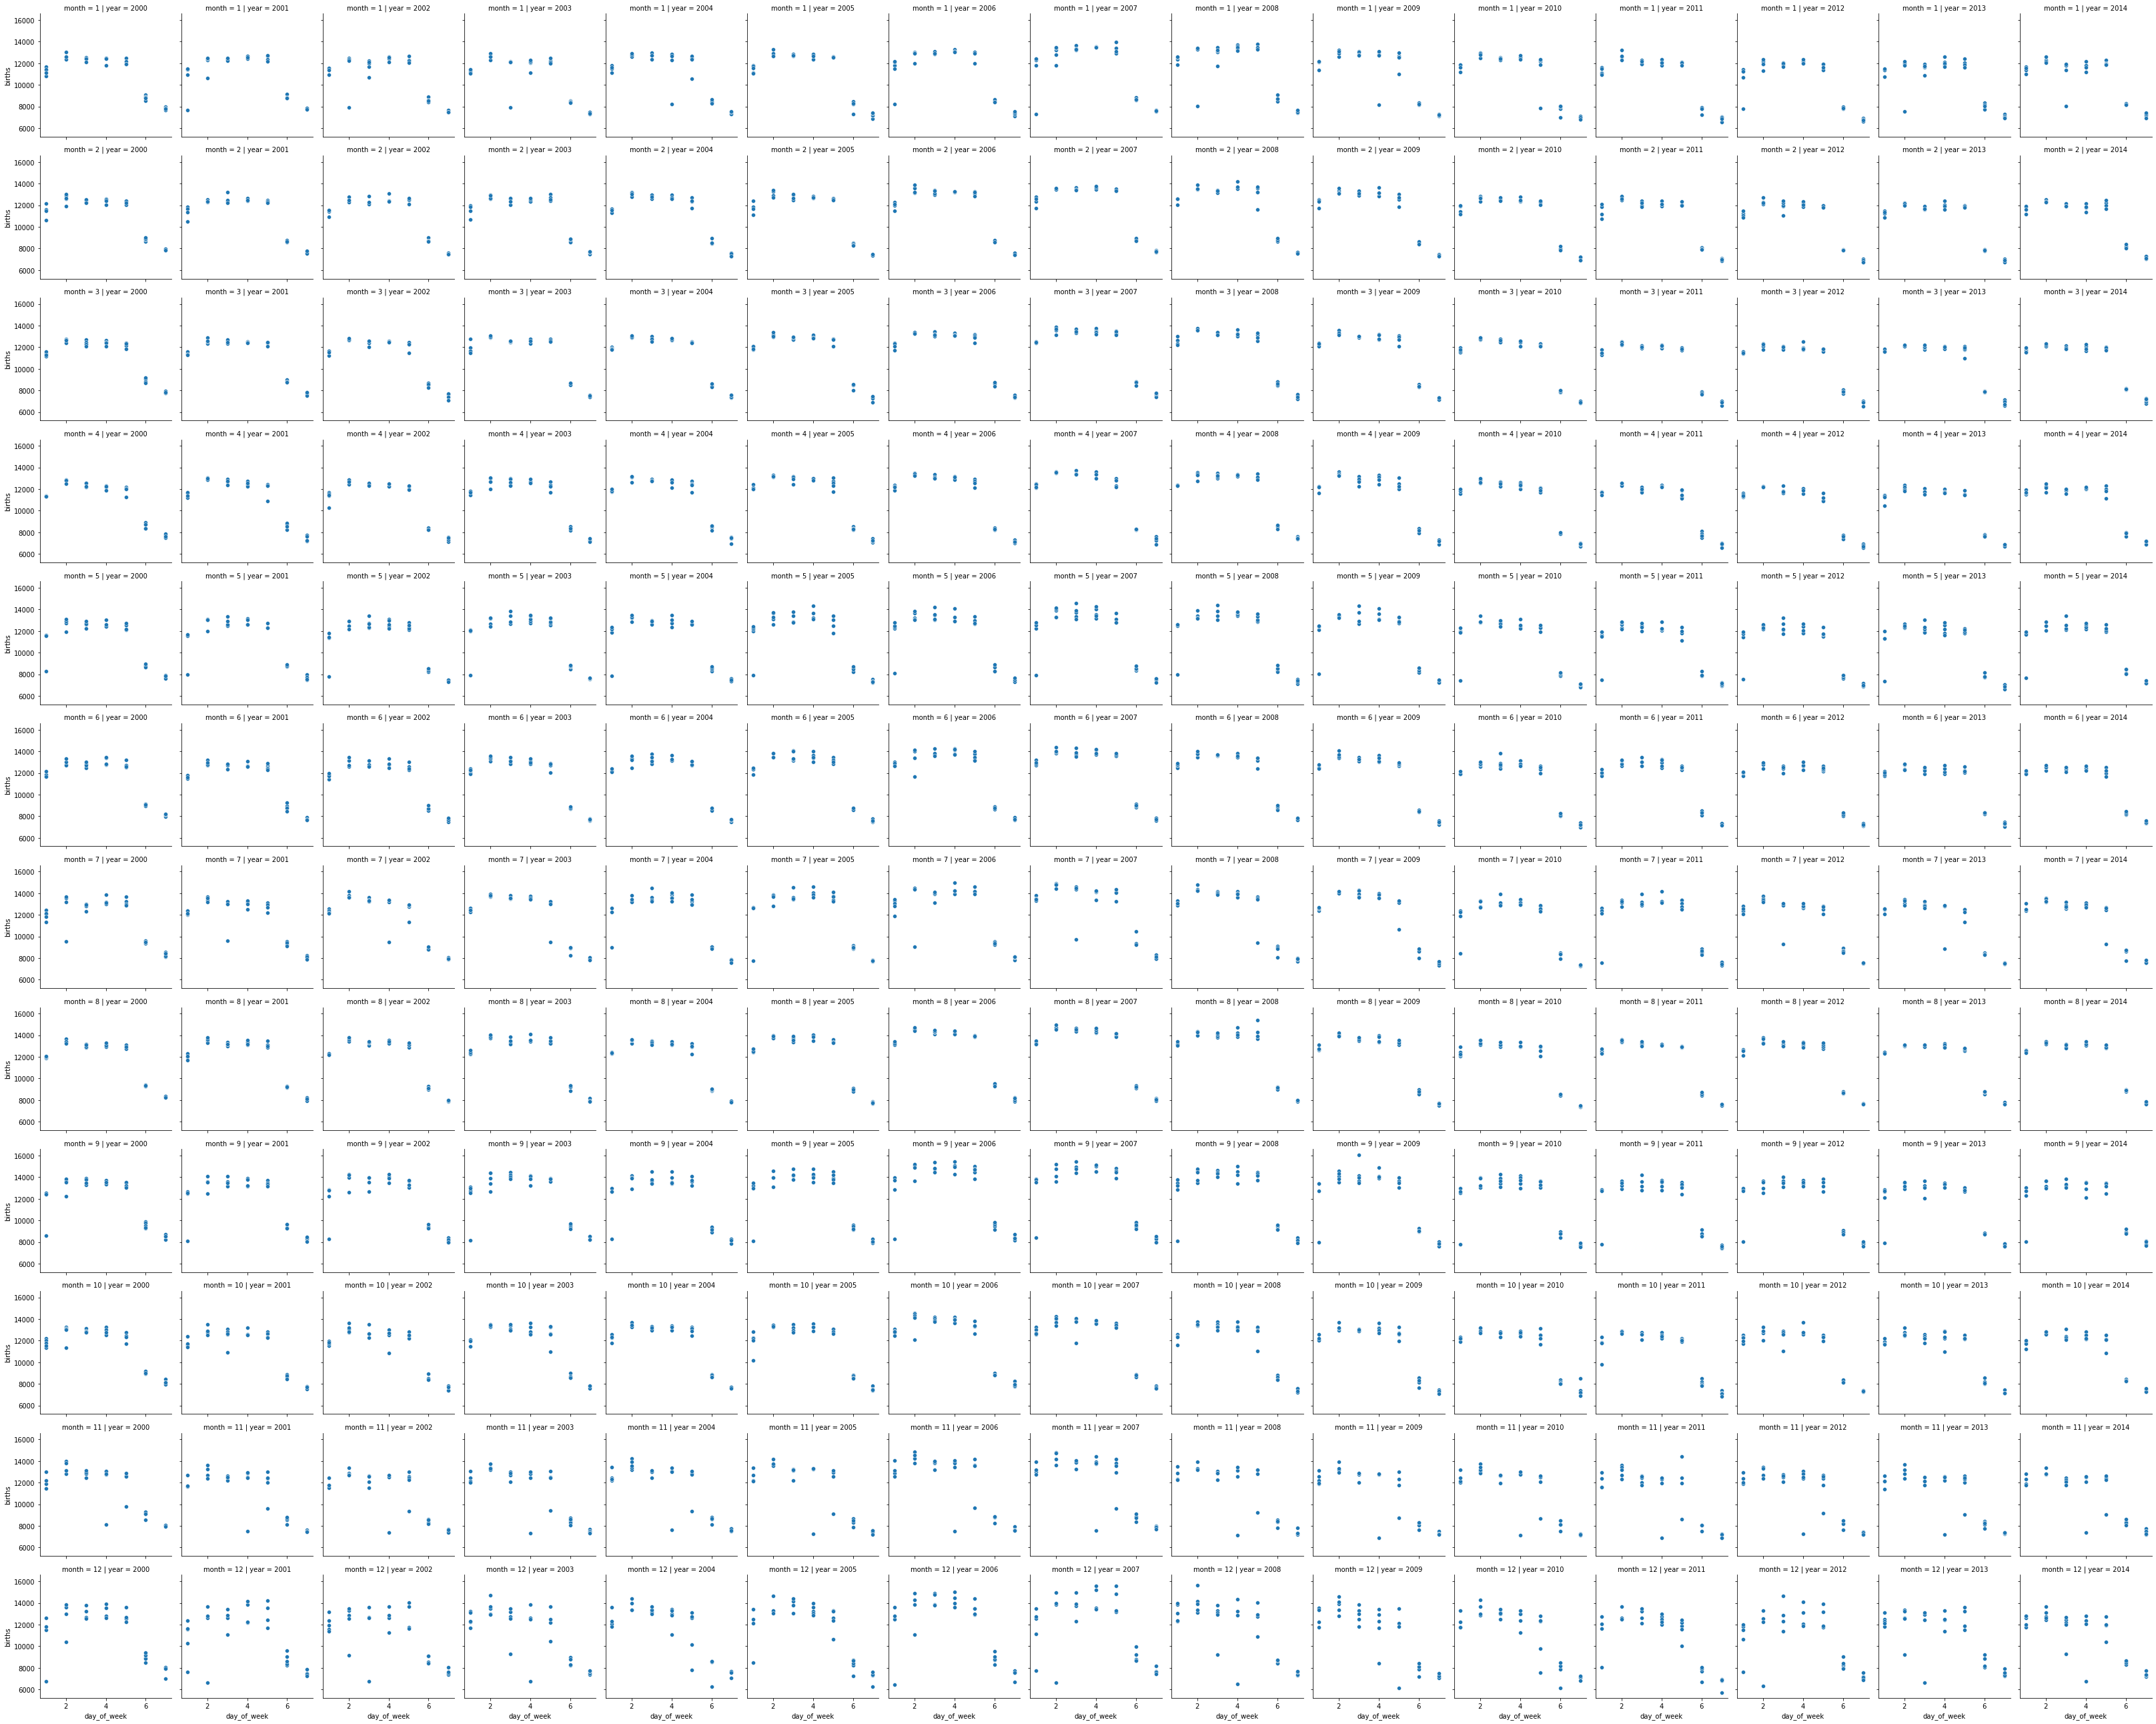

In [65]:
g = sns.FacetGrid(nascimentos, col="year",  row="month")
g.map(sns.scatterplot, "day_of_week", "births")